<a href="https://colab.research.google.com/github/vaariasa/senalesysistemas/blob/master/parcial_1se%C3%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller/Parcial_1: Señales y sistemas 2020-1
Valentina Arias Arias.

Universidad Nacional de Colombia- sede Manizales

#2. Conceptos básicos de señales

– Evaluar la expresión $\int_{-\infty}^{\infty}t^2e^{-\sin(t)}
\cos(2t)\delta(2t-2\pi)dt$.
 Comprobar el resultado en simulacion con la librería SymPy.

 **Solucion:**

$I= \int_{-\infty}^{\infty}t^2e^{-\sin(t)}
\cos(2t)\delta(2t-2\pi)dt$

$I= \int_{-\infty}^{\infty}t^2e^{-\sin(t)}
\cos(2t)\delta(2[t-\pi])dt$

Por la propiedad de escalamiento:

$I= \frac{1}{|2|}\int_{-\infty}^{\infty}t^2e^{-\sin(t)}\cos(2t)\delta(t-\pi)dt$

Como $\delta(t-\pi)$ se aciva en $\pi$, entonces:

$I= \frac{x(\pi)}{2}$

$= \frac{1}{2}\pi^2e^{-\sin(\pi)}\cos(2\pi)$

Donde $\cos(2\pi)=1$, $e^{-\sin(\pi)}=1$, por lo que:

$$I= \frac{1}{2}\pi^2$$




In [0]:
!pip install sympy

In [0]:
import sympy as sym
sym.init_printing()

delta = sym.DiracDelta(2*(t-sym.pi))
f= sym.Function('f')(t)
f= t**(2)*sym.exp(-sym.sin(t))*sym.cos(2*t)
sym.integrate(delta*f, (t, -sym.oo, sym.oo))

$$\frac{\pi^{2}}{2}$$




– Sea $x(t) = u(t-to)-u(t-nto)-kδ(t-mto)$. Determine
el valor de k para el cual $\int_{-\infty}^{\infty}x(t)dt = 0$. Comprobar el
resultado en simulacion con la librería SymPy.

**Solucion:**


$0= \int_{-\infty}^{\infty} u(t-to)-u(t-nto)-kδ(t-mto)dt$

$0= \int_{-\infty}^{\infty} u(t−to)−u(t−nto)dt−k\int_{-\infty}^{\infty}δ(t-mto)dt$

$0= \int_{t_0}^{nt_0}dt-k$

$0= t\Biggr|_{t_0}^{nt_0}-k$

$$k= nt_0-t_0$$





In [0]:
import sympy as sym
to = sym.symbols('to ', real=True)
nto = sym.symbols('nto ', real=True)
mto = sym.symbols('mto ', real=True)
t = sym.symbols('t ', real=True)
k = sym.symbols('k ', real=True)
delta= sym.DiracDelta(t-mto)
a= sym.integrate(1,(t,to,nto))
a-sym.integrate(k*delta, (t, -sym.oo, sym.oo))

-k + nto - to

$- k + nto - to$
por lo que se comprueba que $k=nto-to$

– Consulte en que consisten las señales cuasiperiodicas. Luego, demuestre la periodicidad o no de las siguientes señales

• $x(t) = 3\cos(ωt)$

Señal periodica $x(t) =x(t\pm T)$ 

$3\cos(ωt)=3\cos(ω(t\pm T)=3\cos(wt \pm wT)$

$\alpha=wt, \beta=wT$

$3\cos(wt \pm wT)= 3[\cos(wt)\cos(wT)\pm \sin(wt)\sin(wT)]$

$w=\frac{2\pi}{T_o}; T_o=T$

$3\cos(wt \pm wT)= 3[\cos(wt)\cos(\frac{2\pi}{T}T)\pm \sin(wt)\sin(\frac{2\pi}{T}T)]$

$\cos(\frac{2\pi}{T}T)=1$; $\sin(\frac{2\pi}{T}T)=0$

$$3\cos(wt \pm wT)= 3\cos(ωt)$$ **La señal es periodica**

F = 1.0[Hz]


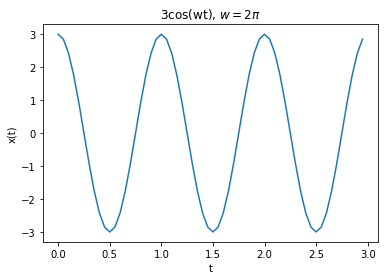

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
w = 2*np.pi
f= w/(2*np.pi)
print('F = %.1f[Hz]'% (f))
fs= 20*f
t= 1/f
ts= 1/fs
vt = np.arange(0,3*t,ts)
x = 3*np.cos(w*vt)
plt.plot(vt,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("3cos(wt), $w=2\pi$")
plt.show()

• $x(t) = 2 \sin(ωt +\pi)$

$x(t) = 2 \sin(ωt +\pi)= 2 \sin(ω(t\pm T) +\pi)$=?

$2 \sin(ω(t\pm T) +\pi)= 2 \sin((ωt +\pi)\pm wT)$

$\alpha=wt+\pi; \beta=wT$

$2 \sin(ω(t\pm T) +\pi)=2[\sin(wt +\pi)\cos(wT) \pm sin(wT)\cos(wt+\pi)]$

$w=\frac{2\pi}{T_o}; T_o=T$

$2 \sin(ω(t\pm T) +\pi)=2[\sin(wt +\pi)\cos(\frac{2\pi}{T}T) \pm sin(\frac{2\pi}{T}T)\cos(wt+\pi)]$

$\cos(\frac{2\pi}{T}T)=1$; $\sin(\frac{2\pi}{T}T)=0$

$$2 \sin(ω(t\pm T) +\pi) = 2 \sin(ωt +\pi)$$ **la señal es periodica**


F = 100.0[Hz]


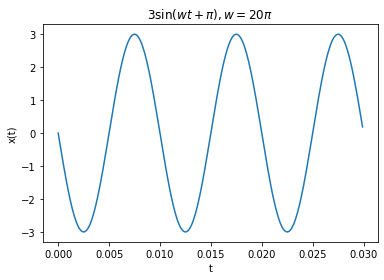

In [0]:
w= 200*np.pi
f= w/(2*np.pi)
print('F = %.1f[Hz]'% (f))
fs= 100*f
t= 1/f
ts= 1/fs
vt = np.arange(0,3*t,ts)
x = 3*np.sin((w*vt)+np.pi)
plt.plot(vt,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("$3\sin(wt+\pi), w=20\pi$")
plt.show()

• $x(t)=3\sin(\sqrt3t)+3\sin(5t)-2\cos(t/\sqrt3)$

$w_1=\sqrt3=\frac{2\pi}{T_1}; w_2=5=\frac{2\pi}{T_2}; w_3=\frac{1}{\sqrt3}=\frac{2\pi}{T_3}$

Para demostra si es cuasiperiodica $\frac{w_1}{w_2}$, $\frac{w_1}{w_3}$ y $\frac{w2}{w_3}$ deben ser entero sobre entero:

$\frac{w_1}{w_2}=\frac{\sqrt3}{5}$-> Como una de las ecuaciones no cumple ser entero sobre entero, la funcion no es cuasiperiodica

F1 = 0.3[Hz];F2 = 0.8[Hz];F3 = 0.1[Hz]


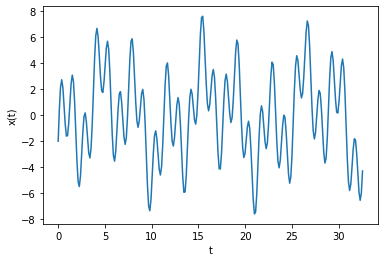

In [0]:
w1=np.sqrt(3)
w2=5
w3=1/np.sqrt(3)
f1=w1/(2*np.pi)
f2=w2/(2*np.pi)
f3=w3/(2*np.pi)
print('F1 = %.1f[Hz];F2 = %.1f[Hz];F3 = %.1f[Hz]' % (f1,f2,f3))
fs=10*f2
t1=1/f1
t2=1/f2
t3=1/f3
ts=1/fs
vt = np.arange(0,3*t3,ts)
x = 3*np.sin(np.sqrt(3)*vt)+3*np.sin(5*vt)-2*np.cos(vt/np.sqrt(3))
plt.plot(vt,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

• $x(t)=3\sin(4t)-2\cos(50t)+2\cos(10t)$

$w_1=4=\frac{2\pi}{T_1}, w_2=50= \frac{2\pi}{T_2} , w_3= 10 =\frac{2\pi}{T_3} $

$\frac{w_1}{w_2}=\frac{4}{50},\frac{w_1}{w_3}=\frac{4}{10},\frac{w_2}{w_3}=\frac{50}{10} $ -> todas son entero sobre entero por lo que es una señal cuasiperiodica.

Ahora hallamos el periodo 'T' de la señal:

$T_1= \frac{\pi}{2},T_2= \frac{\pi}{25},T_3= \frac{\pi}{5} $

$k_1T_1=k_2T_2=k_3T_3=T$

\begin{align}
k_1\frac{\pi}{2}=k_2\frac{\pi}{25}=k_3\frac{\pi}{5} =T
\end{align}

simplificando tenemos:

$25k_1=2k_2=10_k3$

m.c.m(25,2,10)-> m.c.m=$5^2*2$-> m.c.m= 50

$25k_1=2k_2=10_k3=50$ -> $k_1=2, k_2=25, k_3= 5$ reemplazamos en (1)

$2\frac{\pi}{2}=25\frac{\pi}{25}=5\frac{\pi}{5} = \pi$

$$\pi=T$$

F1 = 0.6[Hz];F2 = 8.0[Hz];F3 = 1.6[Hz]


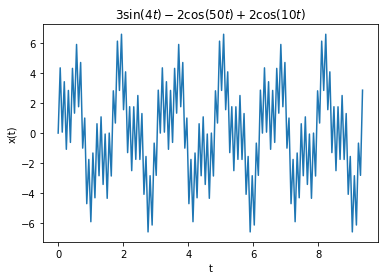

In [0]:
w1=4
w2=50
w3=10
f1=w1/(2*np.pi)
f2=w2/(2*np.pi)
f3=w3/(2*np.pi)
print('F1 = %.1f[Hz];F2 = %.1f[Hz];F3 = %.1f[Hz]' % (f1,f2,f3))
fs=2*f2
ts=1/fs
t= (np.pi)
vt = np.arange(0,3*t,ts)
x = 3*np.sin(4*vt)-2*np.cos(50*vt)+2*np.cos(10*vt)
plt.plot(vt,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('$3\sin(4t)-2\cos(50t)+2\cos(10t)$')
plt.show()



• $x(t)=e^{jwt}$

$e^{jwt}=e^{jw(t\pm T)}$=?

$e^{jw(t\pm T)}=e^{jwt}e^{\pm jwT} $ 

Como debe ser igual a $e^{jwt}$ entonces $e^{\pm jwT}=1 $

$e^{\pm jwT}= \cos(wt) \pm j\sin(wT)= 1$

$w= \frac{2\pi}{T_o}, T_o=T$

$\cos(\frac{2\pi}{T}T) \pm j\sin(\frac{2\pi}{T}T)=1$

$\cos(\frac{2\pi}{T}T)=1$, $j\sin(\frac{2\pi}{T}T)=0$ -> se cumple

como $e^{jwt}=e^{jw(t\pm T)}$-> **la señal es periodica**

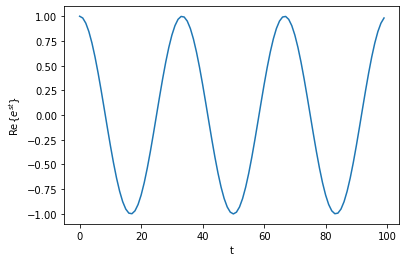

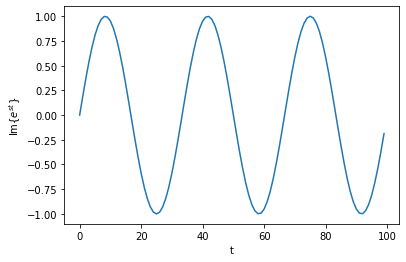

In [38]:
w=3
f=w/(2*np.pi)
t=1/f
fs= 2*f
vt = np.arange(0,3*t,ts)
x = np.exp(1j*w*vt)
plt.plot(np.real(x))
plt.ylabel('Re{$e^{st}$}')
plt.xlabel('t')
plt.show()
plt.plot(np.imag(x))
plt.ylabel('Im{$e^{st}$}')
plt.xlabel('t')
plt.show()


#3.Señales de energia y potencia
– Clasifique segun su tipo (energía o potencia) y Grafique cada una de las senales en Python (considere simulaciones tipo plot para tiempo continuo y stem para tiempo discreto).

$x(t) = -3t + 1; ∀t ∈ [0, 5]$

$E_x= \int_{T} |x(t)|^2dt$

$E_x= \int_{0}^{5} |-3t+1|^2dt$

$E_x= \int_{0}^{5} (9t^2-6t+1)dt$

$


